# Projet SNCF Dhalil BELLO & Miracle VODOUMBO

### Question 1: Explication et définition de chacunes des colonnes du fichier des objets trouvés

Colonne 1 (Date): contient les dates et heures auxquelles les objets ont été trouvés, en format ISO 8601;

Colonne 2 (Date et heure de restitution): contient les dates et heures auxquelles les objets ont été restitués, en format ISO 8601;

Colonne 3 (Gare): contient les villes et/ou gares dans lesquelles les objets ont été perdus;

Colonne 4 (Code IUC): contient la codification numérique unifiée de chaque réseau de chemins de fer;

Colonne 5 (Nature d'objets): contient les noms des objets perdus ("Porte-monnaie", "Portefeuille", "Sac à dos", "Téléphone portable",...);

Colonne 6 (Type d'objets): contient les types des objets retrouvés; les objets sont regroupés dans des catégories d'objets;

Colonne 7 (Type d'enregistrement): précise que les objets ont été enrégistrés en tant qu'objets trouvés.

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 2: Chargement des bases de données

In [2]:
#Base de données
dft = pd.read_csv("objets-trouves-restitution.csv", sep=";")
dfp = pd.read_csv("objets-trouves-gares.csv", sep=";")

In [3]:
dft.head(3)

Date Date et heure de restitution                Gare  \
0  2019-08-12T11:44:21+02:00                          NaN           Périgueux   
1  2019-08-12T11:56:13+02:00    2019-08-20T12:22:04+02:00          Strasbourg   
2  2019-08-12T12:21:06+02:00                          NaN  Paris Gare de Lyon   

     Code UIC                                Nature d'objets  \
0  87595009.0                             Téléphone portable   
1  87212027.0     Téléphone portable protégé (étui, coque,…)   
2  87686006.0  Cartable, trousse d'écolier, dossier scolaire   

                                       Type d'objets Type d'enregistrement  
0  Appareils électroniques, informatiques, appare...          Objet trouvé  
1  Appareils électroniques, informatiques, appare...          Objet trouvé  
2                Articles d'enfants, de puériculture          Objet trouvé

On remarque lors du chargement des données que l'absence de séparateur conduit à une erreur de chargement. Il faut donc spécifier le séparateur pour que le chargement ait lieu.

### Question 3: Description de la base de données

In [4]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692310 entries, 0 to 692309
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          692310 non-null  object 
 1   Date et heure de restitution  236984 non-null  object 
 2   Gare                          692019 non-null  object 
 3   Code UIC                      692019 non-null  float64
 4   Nature d'objets               692310 non-null  object 
 5   Type d'objets                 692310 non-null  object 
 6   Type d'enregistrement         692310 non-null  object 
dtypes: float64(1), object(6)
memory usage: 37.0+ MB


On observe que toutes les variables de la base de données sont des chaînes de caractères sauf la variable Code IUC qui est un entier.



In [5]:
null = pd.DataFrame(dft.isnull().sum(),columns=['Valeurs nulles'])
null['Pourcentage'] = (dft.isnull().sum()/len(dft)*100)
null

Valeurs nulles  Pourcentage
Date                                       0     0.000000
Date et heure de restitution          455326    65.769092
Gare                                     291     0.042033
Code UIC                                 291     0.042033
Nature d'objets                            0     0.000000
Type d'objets                              0     0.000000
Type d'enregistrement                      0     0.000000

Les valeurs nulles sont observées au niveau des colonnes Date et heure de restitution (66%), Gare (0,04%) et Code IUC (0,04%). 



In [6]:
stat2 = pd.DataFrame(dft["Gare"].value_counts())
stat2['Pourcentage'] = (stat2["Gare"]/len(dft["Type d'objets"]))*100
stat2.head(5)

Gare  Pourcentage
Paris Gare de Lyon  52743     7.618408
Paris Montparnasse  49263     7.115743
Paris Gare du Nord  40228     5.810692
Strasbourg          31243     4.512863
Paris Saint-Lazare  28828     4.164031

On observe que les gares où sont enrégistrés le plus d'objets retrouvés sont localisées à Paris. La gare de Paris Lyon occupe la première place suivie par la gare de Paris Montparnasse et celle de Paris Gare du Nord.

### Question 4: Conversion des colonnes de date en format plus utilisable

In [7]:
#Format date
dft[['Date', 'Date et heure de restitution']].head(5)

Date Date et heure de restitution
0  2019-08-12T11:44:21+02:00                          NaN
1  2019-08-12T11:56:13+02:00    2019-08-20T12:22:04+02:00
2  2019-08-12T12:21:06+02:00                          NaN
3  2019-08-12T12:23:53+02:00                          NaN
4  2019-08-12T12:27:18+02:00                          NaN

In [8]:
#Changement du format de la date
from datetime import datetime
dft['Date']=pd.to_datetime(dft['Date'], utc=True).dt.strftime("%Y-%m-%d")
dft['Date'] = pd.to_datetime(dft['Date'])
dft['Date'].head(2)

0   2019-08-12
1   2019-08-12
Name: Date, dtype: datetime64[ns]

In [9]:
#Changement du format de la date de restitution
from datetime import datetime
dft['Date et heure de restitution']=pd.to_datetime(dft['Date et heure de restitution'], utc=True).dt.strftime("%Y-%m-%d")
dft['Date et heure de restitution'] = pd.to_datetime(dft['Date et heure de restitution'])
dft['Date et heure de restitution'].head(2)

0          NaT
1   2019-08-20
Name: Date et heure de restitution, dtype: datetime64[ns]

### Question 5: Date de début du jeu de données

In [10]:
dft['Date'].min()

Timestamp('2013-05-24 00:00:00')

### Question 6-a: Année, mois et jour de la semaine où il y a eu plus d'objets trouvés et déclarés perdus

In [11]:
#Traitement base objets déclarés perdus
dfp.head(2)

Date      Gare    Code UIC  \
0  2018-09-04T06:22:57+02:00  Mulhouse  87182063.0   
1  2017-03-22T09:20:50+01:00       NaN         NaN   

                         Nature d'objets                        Type d'objets  \
0  Sac d'enseigne (plastique, papier, …)  Bagagerie: sacs, valises, cartables   
1              Valise, sac sur roulettes  Bagagerie: sacs, valises, cartables   

  Type d'enregistrement  
0  Déclaration de Perte  
1  Déclaration de Perte

In [12]:
#Changement du format de la date
dfp['Date']=pd.to_datetime(dfp['Date'], utc=True).dt.strftime("%Y-%m-%d")
dfp['Date'] = pd.to_datetime(dfp['Date'])
dfp['Date'].head(2)

0   2018-09-04
1   2017-03-22
Name: Date, dtype: datetime64[ns]

In [13]:
#Récupération de l'année, du jour, et du mois

#Base object trouvé
dft['year']= dft['Date'].dt.year
dft['month']= dft['Date'].dt.month
dft['day']= dft['Date'].dt.day_name()

#base object perdus
dfp['year']= dfp['Date'].dt.year
dfp['month']= dfp['Date'].dt.month
dfp['day']= dfp['Date'].dt.day_name()

In [14]:
#Objets trouvés par année
annee = pd.DataFrame(dft['year'].value_counts()).sort_index(ascending=True)
annee

year
2013  12989
2014  87117
2015  98578
2016  95555
2017  97924
2018  90264
2019  88263
2020  47351
2021  61987
2022  12282

Il y' a eu plus d'objets trouvés en 2015.

In [15]:
#Objets déclarés perdus par année
annee1 = pd.DataFrame(dfp['year'].value_counts()).sort_index(ascending=True)
annee1

year
2013    8853
2014  114106
2015  181098
2016  177241
2017  192931
2018  174955
2019  185066
2020  117561
2021  169673
2022   36083

Il y'a eu plus d'objets déclarés perdus en 2017.

<AxesSubplot:xlabel='year'>

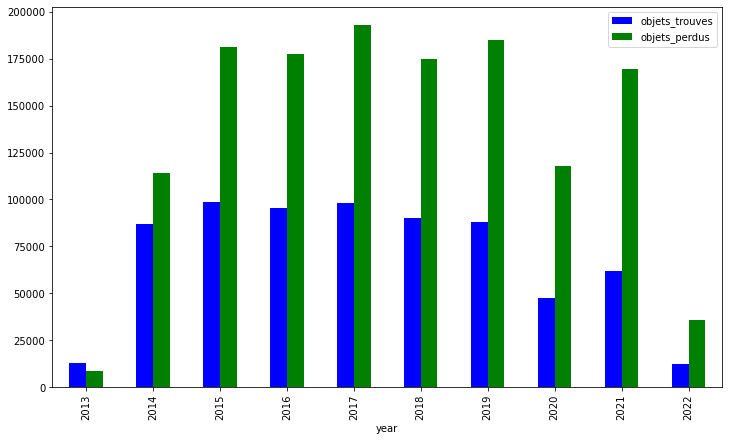

In [76]:
#Representation graphique
merged_year = annee.merge(annee1, left_index=True, right_index=True)
merged_year['year'] = merged_year.index
merged_year.rename(columns={'year_x': 'objets_trouves', 'year_y': 'objets_perdus'}, inplace=True)
merged_year.plot.bar(x="year", figsize=(12,7), color={"objets_trouves":"blue", "objets_perdus":"green"})

In [77]:
# Objets trouvés par mois
import calendar
period = dft.Date.dt.to_period("M")
mois = pd.DataFrame(dft['month'].groupby(period).value_counts(ascending=False))
mois.rename(columns={'month': 'month_trouves'} , inplace=True)
mois = mois.reset_index(level=[1])
mois["month"] = mois["month"].apply(lambda x: calendar.month_name[x])

In [18]:
# Objets déclarés perdus par mois
import calendar
period_p= dfp.Date.dt.to_period("M")
mois_p= pd.DataFrame(dfp['month'].groupby(period_p).value_counts(ascending=False))
mois_p.rename(columns={'month': 'month_perdus'}, inplace=True)
mois_p = mois_p.reset_index(level=[1])
mois_p["month"] = mois_p["month"].apply(lambda x: calendar.month_name[x])

In [19]:
# Objets perdus et retrouvé
merged_month = mois.merge(mois_p, left_index=True, right_index=True).drop(columns=["month_y"])
merged_month = merged_month.groupby("month_x")[["month_trouves", "month_perdus"]].sum()
merged_month

month_trouves  month_perdus
month_x                               
April              47706         86232
August             64686        124622
December           56322        113253
February           55870        112587
January            56152        116014
July               69657        133346
June               57554        106059
March              53777        105229
May                50701         90673
November           54597        114488
October            63009        129111
September          62279        125953

<AxesSubplot:xlabel='month'>

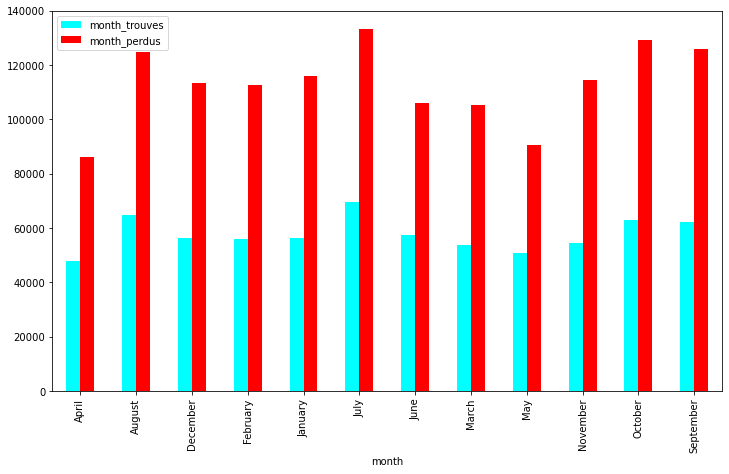

In [20]:
#Représentation graphique
merged_month["month"] = merged_month.index
merged_month.plot.bar(x="month", figsize=(12,7), color={"month_trouves":"cyan", "month_perdus":"red"})

In [21]:
# Objets trouvés par jours
day = pd.DataFrame(dft['day'].value_counts())
day

day
Monday     142646
Tuesday    115557
Friday     109302
Wednesday  107666
Thursday   104840
Saturday    64750
Sunday      47549

In [22]:
# Objets perdus par jours
day_p = pd.DataFrame(dfp['day'].value_counts())
day_p

day
Monday     256949
Tuesday    213587
Friday     213369
Wednesday  202578
Thursday   197623
Saturday   148576
Sunday     124885

<AxesSubplot:xlabel='day'>

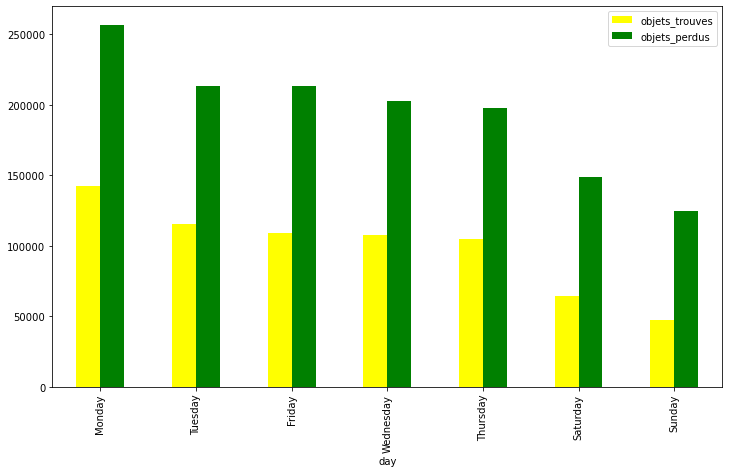

In [23]:
#Représentation graphique
merged_day = day.merge(day_p, left_index=True, right_index=True)
merged_day['day'] = merged_day.index
merged_day.rename(columns={'day_x': 'objets_trouves', 'day_y': 'objets_perdus'}, inplace=True)
merged_day.plot.bar(x="day", figsize=(12,7), color={"objets_trouves":"yellow", "objets_perdus":"green"})

### 6-b. Traçons trois courbes affichant l’évolution du nombres d’objets déclarés perdus, trouvés et restitué depuis le début du jeu de donnée.

In [24]:
#Récupération de l'année pour la date de restitution
dft['year_r']= dft['Date et heure de restitution'].dt.year
annee_r = pd.DataFrame(dft['year_r'].dropna().value_counts()).sort_index(ascending=True)
annee_r['year'] = annee_r.index
annee_r.rename(columns={'year_r': 'objets_restitues'}, inplace=True)

In [25]:
merged_year_final = merged_year.merge(annee_r, left_index=True, right_index=True)
merged_year_final.rename(columns={'year_x': 'year'}, inplace=True)
merged_year_final

objets_trouves  objets_perdus  year  objets_restitues  year_y
2013           12989           8853  2013              3346  2013.0
2014           87117         114106  2014             24794  2014.0
2015           98578         181098  2015             30401  2015.0
2016           95555         177241  2016             31891  2016.0
2017           97924         192931  2017             33591  2017.0
2018           90264         174955  2018             32593  2018.0
2019           88263         185066  2019             32177  2019.0
2020           47351         117561  2020             17516  2020.0
2021           61987         169673  2021             25048  2021.0
2022           12282          36083  2022              5627  2022.0

In [26]:
#Représentation graphique
merged_year_final['year'] = merged_year_final.index
merged_year_final

objets_trouves  objets_perdus  year  objets_restitues  year_y
2013           12989           8853  2013              3346  2013.0
2014           87117         114106  2014             24794  2014.0
2015           98578         181098  2015             30401  2015.0
2016           95555         177241  2016             31891  2016.0
2017           97924         192931  2017             33591  2017.0
2018           90264         174955  2018             32593  2018.0
2019           88263         185066  2019             32177  2019.0
2020           47351         117561  2020             17516  2020.0
2021           61987         169673  2021             25048  2021.0
2022           12282          36083  2022              5627  2022.0

In [27]:
merged_year_final = merged_year_final.drop(columns="year_y")
merged_year_final


objets_trouves  objets_perdus  year  objets_restitues
2013           12989           8853  2013              3346
2014           87117         114106  2014             24794
2015           98578         181098  2015             30401
2016           95555         177241  2016             31891
2017           97924         192931  2017             33591
2018           90264         174955  2018             32593
2019           88263         185066  2019             32177
2020           47351         117561  2020             17516
2021           61987         169673  2021             25048
2022           12282          36083  2022              5627

<AxesSubplot:xlabel='year'>

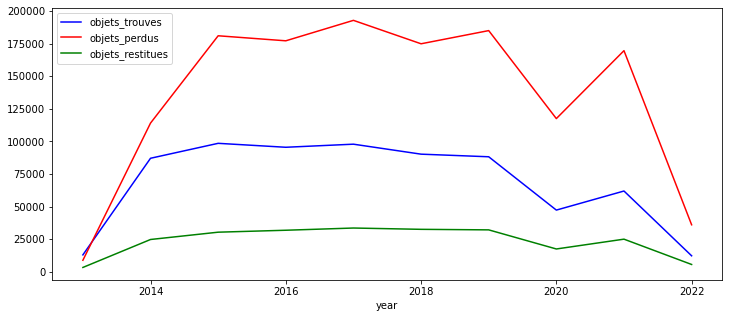

In [28]:
merged_year_final.plot(x="year", figsize=(12,5), color={"objets_trouves":"blue", "objets_perdus":"red", "objets_restitues":"green"})

### 7. Trouvons les 3 gares où il y a le plus d’objets restitués en pourcentage des objets trouvés.

In [29]:
stat3 = pd.DataFrame(dft.groupby("Gare")[["year","year_r"]].sum())
stat3.rename(columns={'year': 'objets_trouvés', 'year_r': 'objets_restitués'}, inplace=True)
stat3.head(5)

objets_trouvés  objets_restitués
Gare                                                     
Abbeville                        102762           28213.0
Agen                            4196053         1539310.0
Aix-en-Provence TGV             5456198         1865466.0
Aix-les-Bains le Revard          554932          135223.0
Alençon                           86649           34262.0

In [30]:
stat3['Pourcentage'] = ((stat3["objets_restitués"]/stat3["objets_trouvés"])*100)
stat3.head(3)

objets_trouvés  objets_restitués  Pourcentage
Gare                                                              
Abbeville                    102762           28213.0    27.454701
Agen                        4196053         1539310.0    36.684713
Aix-en-Provence TGV         5456198         1865466.0    34.189852

In [31]:
stat3['Pourcentage'].sort_values(ascending=False).head(3)

Gare
Bellegarde         63.825500
Dieppe             62.387082
Bourg-en-Bresse    62.142696
Name: Pourcentage, dtype: float64

Les trois gares où il y a le plus d'objets restitués en pourcentage d'objets trouvés sont : 
Gare de Bellegarde avec 63,82% d'objets restitués en pourcentage d'objets trouvés;
Gare de Dieppe avec 62,38% d'objets restitués en pourcentage d'objets trouvés;
Gare de Bourg-en-Bresse avec 62,14% d'objets restitués en pourcentage d'objets trouvés.

### 8-a. Calculons le volume d’objets déclarés perdus par gare

In [32]:
stat4 = pd.DataFrame(dfp.groupby("Gare")["year"].sum())
stat4.rename(columns={'year': 'objets_perdus'}, inplace=True)
stat4

objets_perdus
Gare                                  
Abbeville                        70522
Agen                           2365932
Aix-en-Provence TGV            2932545
Aix-les-Bains le Revard         161395
Alençon                         135023
...                                ...
Yvetot                          163254
Épinal                          431453
Étaples - Le Touquet            112837
Évian-les-Bains                  44377
Évreux Normandie                520046

[183 rows x 1 columns]

In [33]:
stat4['objets_perdus'].sort_values(ascending=False).head(5)

Gare
Paris Gare de Lyon    93998552
Paris Montparnasse    79882270
Paris Gare du Nord    60217129
Paris Saint-Lazare    60149661
Strasbourg            38006769
Name: objets_perdus, dtype: int64

### 8-b. Associons à chaque gare une position GPS pour pouvoir l’afficher sur la carte

In [34]:
pip install geopy 

Note: you may need to restart the kernel to use updated packages.


In [35]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

In [36]:
adress = pd.DataFrame((dft["Gare"]).dropna().value_counts())
adress = adress.rename_axis('gare').reset_index()
adress = adress.drop(columns="Gare")
adress

gare
0    Paris Gare de Lyon
1    Paris Montparnasse
2    Paris Gare du Nord
3            Strasbourg
4    Paris Saint-Lazare
..                  ...
176            Biarritz
177    Thonon-les-Bains
178      Lille Flandres
179          Bar-le-Duc
180             Forbach

[181 rows x 1 columns]

In [37]:
adress["gare"] = adress["gare"].apply(lambda x: x if "Gare" in x else "Gare " + x)
adress

gare
0         Paris Gare de Lyon
1    Gare Paris Montparnasse
2         Paris Gare du Nord
3            Gare Strasbourg
4    Gare Paris Saint-Lazare
..                       ...
176            Gare Biarritz
177    Gare Thonon-les-Bains
178      Gare Lille Flandres
179          Gare Bar-le-Duc
180             Gare Forbach

[181 rows x 1 columns]

In [38]:
loc = Nominatim(user_agent="Getloc")
adress["Longitude"] = adress["gare"].apply((loc.geocode))
adress["Longitude"] = adress["Longitude"].apply(lambda x: (x.longitude) if x is not None else x)

In [39]:
loc = Nominatim(user_agent="Getloc2")
adress["Latitude"] = adress["gare"].apply((loc.geocode))
adress["Latitude"] = adress["Latitude"].apply(lambda x: (x.latitude) if x is not None else x)

In [40]:
adress

gare  Longitude   Latitude
0         Paris Gare de Lyon   2.373479  48.844806
1    Gare Paris Montparnasse   2.323221  48.841624
2         Paris Gare du Nord   2.354973  48.880400
3            Gare Strasbourg   7.733925  48.585293
4    Gare Paris Saint-Lazare   2.325237  48.876530
..                       ...        ...        ...
176            Gare Biarritz  -1.557936  43.479487
177    Gare Thonon-les-Bains   6.481570  46.368963
178      Gare Lille Flandres   3.070667  50.636327
179          Gare Bar-le-Duc   5.321196  48.686392
180             Gare Forbach   6.529573  49.290045

[181 rows x 3 columns]

### 8-c. Affichons la donnée sur la carte

In [41]:
stat4 = stat4.rename_axis('gare').reset_index()
stat4

gare  objets_perdus
0                  Abbeville          70522
1                       Agen        2365932
2        Aix-en-Provence TGV        2932545
3    Aix-les-Bains le Revard         161395
4                    Alençon         135023
..                       ...            ...
178                   Yvetot         163254
179                   Épinal         431453
180     Étaples - Le Touquet         112837
181          Évian-les-Bains          44377
182         Évreux Normandie         520046

[183 rows x 2 columns]

In [42]:
stat4["gare"] = stat4["gare"].apply(lambda x: x if "Gare" in x else "Gare " + x)
stat4

gare  objets_perdus
0                  Gare Abbeville          70522
1                       Gare Agen        2365932
2        Gare Aix-en-Provence TGV        2932545
3    Gare Aix-les-Bains le Revard         161395
4                    Gare Alençon         135023
..                            ...            ...
178                   Gare Yvetot         163254
179                   Gare Épinal         431453
180     Gare Étaples - Le Touquet         112837
181          Gare Évian-les-Bains          44377
182         Gare Évreux Normandie         520046

[183 rows x 2 columns]

In [43]:
adress_merged = adress.merge(stat4)

In [44]:
adress_merged = adress_merged.dropna()
adress_merged.head(10)

gare  Longitude   Latitude  objets_perdus
0            Paris Gare de Lyon   2.373479  48.844806       93998552
1       Gare Paris Montparnasse   2.323221  48.841624       79882270
2            Paris Gare du Nord   2.354973  48.880400       60217129
3               Gare Strasbourg   7.733925  48.585293       38006769
4       Gare Paris Saint-Lazare   2.325237  48.876530       60149661
5             Gare Lille Europe   3.075714  50.638983       29417507
6  Gare Marseille Saint-Charles   5.696822  44.669795       18188680
7                   Gare Rennes  -1.672659  48.103321       12492495
8      Gare Bordeaux Saint-Jean  -0.556445  44.825900       35738358
9                   Gare Nantes  -1.389053  47.293323       12233380

In [45]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [46]:
import folium

In [47]:
france = folium.Map(location=[46.227638, 2.213749],width="%100",height="%100", default_zoom_start=15)
france

In [48]:
for i in range(0,len(adress_merged)):
   folium.Circle(
      location=[adress_merged.iloc[i]['Latitude'], adress_merged.iloc[i]['Longitude']],
      popup=adress_merged.iloc[i][['gare','objets_perdus']],
      radius=float(adress_merged.iloc[i]['objets_perdus'])/10000,
      color='blue',
      fill=True,
      fill_color='None'
   ).add_to(france)

In [49]:
france

### 8-d. (Bonus) Ajoutons un sélecteur de “type d’objets” pour avoir une carte par catégorie

In [50]:
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim 


In [51]:
perdus = pd.read_csv('objets-trouves-gares.csv', sep=";")
df_perdus = perdus.copy()

In [52]:
selecteur = df_perdus.groupby(["Gare", "Type d'objets"]).size().reset_index(name="Count")
selecteur.head(2)

Gare                                      Type d'objets  Count
0  Abbeville  Appareils électroniques, informatiques, appare...      4
1  Abbeville                Bagagerie: sacs, valises, cartables     16

In [53]:
selecteur["Gare"] = selecteur["Gare"].apply(lambda x: x if "Gare" in x else "Gare "+ x)

In [54]:
loc = Nominatim(user_agent="GetLoc") 
selecteur["Coordonnées"] = (selecteur["Gare"].apply(loc.geocode))
selecteur["Latitude"] = selecteur["Coordonnées"].apply(lambda x: (x.latitude) if x is not None else x)
selecteur["Longitude"] = selecteur["Coordonnées"].apply(lambda x: (x.longitude) if x is not None else x)

In [55]:
selecteur = selecteur.dropna(subset=["Latitude"])

In [56]:
from os import name
import folium
mapCart = folium.Map(location=[46.227638, 2.213749],zoom_start=6)

typeObjets= selecteur["Type d'objets"].drop_duplicates()


i=0
for typeObjet in typeObjets:
    df_filtre = selecteur[selecteur["Type d'objets"] == typeObjet]
    shapesLayer = folium.FeatureGroup(name=typeObjet).add_to(mapCart)
    
    for ind,gare,vol,lat,lon in df_filtre[["Gare", "Count", "Latitude","Longitude"]][:].itertuples():
        folium.Circle(location=[lat, lon],
                    radius=vol,
                    weight=2,
                    color="green",
                    fill_color='red',
                    tooltip="Click me!",
                    popup=("<h4  style='color:#377D22;'><b>Type d\'objets: </h4></b> : "+ str(typeObjet)+
                           "<h4  style='color:#0023F5;'><b>" + str(gare) +"</h4></b>" 
                           +"\n"+" <b>Volume Perdus : </b>"+ str(vol)
                            )
                    ).add_to(shapesLayer)
    i=i+1
folium.LayerControl().add_to(mapCart)

mapCart

### 9. Question libre

In [57]:
#Affichons le top 5 des types d'objets déclarés perdus
stat5 = pd.DataFrame(dfp["Type d'objets"].value_counts())
stat5['Pourcentage'] = (stat5["Type d'objets"]/len(dfp["Type d'objets"]))*100
stat5 = stat5.head(5)
stat5

Type d'objets  Pourcentage
Bagagerie: sacs, valises, cartables                        389399    28.683594
Appareils électroniques, informatiques, apparei...         249962    18.412498
Vêtements, chaussures                                      157115    11.573278
Porte-monnaie / portefeuille, argent, titres               146590    10.797994
Pièces d'identités et papiers personnels                   102537     7.552997

On observe que les bagageries, les appareils électroniques et les vêtements sont en tête de liste des objets perdus. 
Les bagageries représentent plus de 50% des objets perdus ce qui traduit donc que les voyageurs ont la plupart du
temps, tendance à oublier leurs sacs, valises ou cartables. Cela peut être lié au fait d'être pressé ou à l'inatention
des voyageurs.

In [58]:
#Affichons le top 5 des types d'objets retrouvés
stat6 = pd.DataFrame(dft["Type d'objets"].value_counts())
stat6['Pourcentage'] = (stat6["Type d'objets"]/len(dft["Type d'objets"]))*100
stat6 = stat6.head(5)
stat6

Type d'objets  Pourcentage
Bagagerie: sacs, valises, cartables                        206723    29.859889
Appareils électroniques, informatiques, apparei...         101600    14.675507
Vêtements, chaussures                                       90194    13.027979
Porte-monnaie / portefeuille, argent, titres                82369    11.897705
Pièces d'identités et papiers personnels                    61777     8.923315

On remarque que le classement des objets les plus retrouvés correspond au classement des objets les plus perdus avec les bagageries en tête de liste également. Cependant la proportion des objets de types bagagerie retrouvés n'est pas aussi forte au sein des objets retrouvés comparé à la proportion de ce type d'objets au sein des objets perdus.

In [59]:
stat5 = stat5.rename_axis('Objets').reset_index()

In [60]:
stat6 = stat6.rename_axis('Objets').reset_index()

In [61]:
stat6.rename(columns={"Type d'objets": "Type d'objets_t", "Pourcentage": "Pourcentage_t"}, inplace=True)
stat5.rename(columns={"Type d'objets": "Type d'objets_p", "Pourcentage": "Pourcentage_p"}, inplace=True)

In [62]:
stat_merged = stat5.merge(stat6)
stat_merged

Objets  Type d'objets_p  \
0                Bagagerie: sacs, valises, cartables           389399   
1  Appareils électroniques, informatiques, appare...           249962   
2                              Vêtements, chaussures           157115   
3       Porte-monnaie / portefeuille, argent, titres           146590   
4           Pièces d'identités et papiers personnels           102537   

   Pourcentage_p  Type d'objets_t  Pourcentage_t  
0      28.683594           206723      29.859889  
1      18.412498           101600      14.675507  
2      11.573278            90194      13.027979  
3      10.797994            82369      11.897705  
4       7.552997            61777       8.923315

<AxesSubplot:xlabel='Objets'>

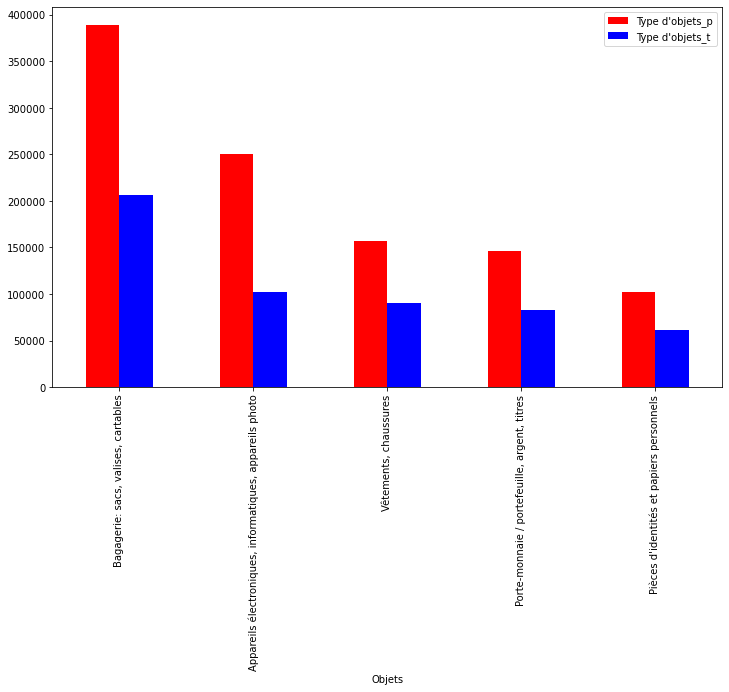

In [63]:
stat_merged = stat_merged.drop(columns={"Pourcentage_p", "Pourcentage_t"})
stat_merged.plot.bar(x="Objets", figsize=(12,7), color={"Type d'objets_p":"red", "Type d'objets_t":"blue"})

### 10. Créons un modèle de machine learning qui pourra prédire le nombre d’objets perdus en 2022. 

In [64]:
dfp.head(10)

Date             Gare    Code UIC  \
0 2018-09-04         Mulhouse  87182063.0   
1 2017-03-22              NaN         NaN   
2 2018-09-04         Mulhouse  87182063.0   
3 2017-03-22              NaN         NaN   
4 2018-09-04  Bourg-en-Bresse  87743005.0   
5 2017-03-22              NaN         NaN   
6 2018-09-04              NaN         NaN   
7 2017-03-22              NaN         NaN   
8 2018-09-04    Lyon Perrache  87722025.0   
9 2017-03-22              NaN         NaN   

                                   Nature d'objets  \
0            Sac d'enseigne (plastique, papier, …)   
1                        Valise, sac sur roulettes   
2       Téléphone portable protégé (étui, coque,…)   
3                               Téléphone portable   
4  Carte d'identité, passeport, permis de conduire   
5                                    Autres divers   
6                      Disque dur externe, clé USB   
7                          Attaché-case, serviette   
8                      Porte-monnaie, portefeuille   
9       Téléphone portable protégé (étui, coque,…)   

                                       Type d'objets Type d'enregistrement  \
0                Bagagerie: sacs, valises, cartables  Déclaration de Perte   
1                Bagagerie: sacs, valises, cartables  Déclaration de Perte   
2  Appareils électroniques, informatiques, appare...  Déclaration de Perte   
3  Appareils électroniques, informatiques, appare...  Déclaration de Perte   
4           Pièces d'identités et papiers personnels  Déclaration de Perte   
5                                             Divers  Déclaration de Perte   
6  Appareils électroniques, informatiques, appare...  Déclaration de Perte   
7                Bagagerie: sacs, valises, cartables  Déclaration de Perte   
8       Porte-monnaie / portefeuille, argent, titres  Déclaration de Perte   
9  Appareils électroniques, informatiques, appare...  Déclaration de Perte   

   year  month        day  
0  2018      9    Tuesday  
1  2017      3  Wednesday  
2  2018      9    Tuesday  
3  2017      3  Wednesday  
4  2018      9    Tuesday  
5  2017      3  Wednesday  
6  2018      9    Tuesday  
7  2017      3  Wednesday  
8  2018      9    Tuesday  
9  2017      3  Wednesday

In [65]:
group = pd.DataFrame(dfp.groupby([ "year"]).size().reset_index(name="Count"))
group

year   Count
0  2013    8853
1  2014  114106
2  2015  181098
3  2016  177241
4  2017  192931
5  2018  174955
6  2019  185066
7  2020  117561
8  2021  169673
9  2022   36083

In [66]:
group = group.drop(9)

In [67]:
group["Count"].describe()

count         9.000000
mean     146831.555556
std       59123.201833
min        8853.000000
25%      117561.000000
50%      174955.000000
75%      181098.000000
max      192931.000000
Name: Count, dtype: float64

<AxesSubplot:xlabel='year', ylabel='Count'>

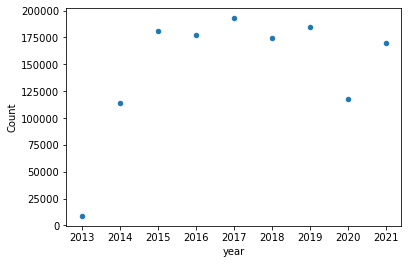

In [68]:
group.plot(kind="scatter", x="year", y="Count")

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
regr = LinearRegression()

In [71]:
regr.fit(group[["year"]], group["Count"])

LinearRegression()

In [72]:
regr.intercept_

-22016468.69444445

In [73]:
regr.coef_

array([10988.25])

In [74]:
# Y = -10988.25*X - 22016468.6944 avec Y = Nombre d'objets perdus et X = Années

In [75]:
regr.predict([[2022]])

array([201772.80555556])

La prédiction pour le nombre d'objets perdus en 2022 est de : 201773 objets